==== Resultados por intervalo (λ_i) ====
Sem correção mecânica (k = 1.0):
  média = 6459.77 nm
  desvio padrão (amostral) = 910.32 nm
  min = 5333.33 nm, max = 8000.00 nm
  Valor teórico = 632.8 nm
  Erro percentual = 920.82%

Com redução mecânica típica (k = 0.1):
  média = 645.98 nm
  desvio padrão (amostral) = 91.03 nm
  min = 533.33 nm, max = 800.00 nm
  Valor teórico = 632.8 nm
  Erro percentual = 2.08%



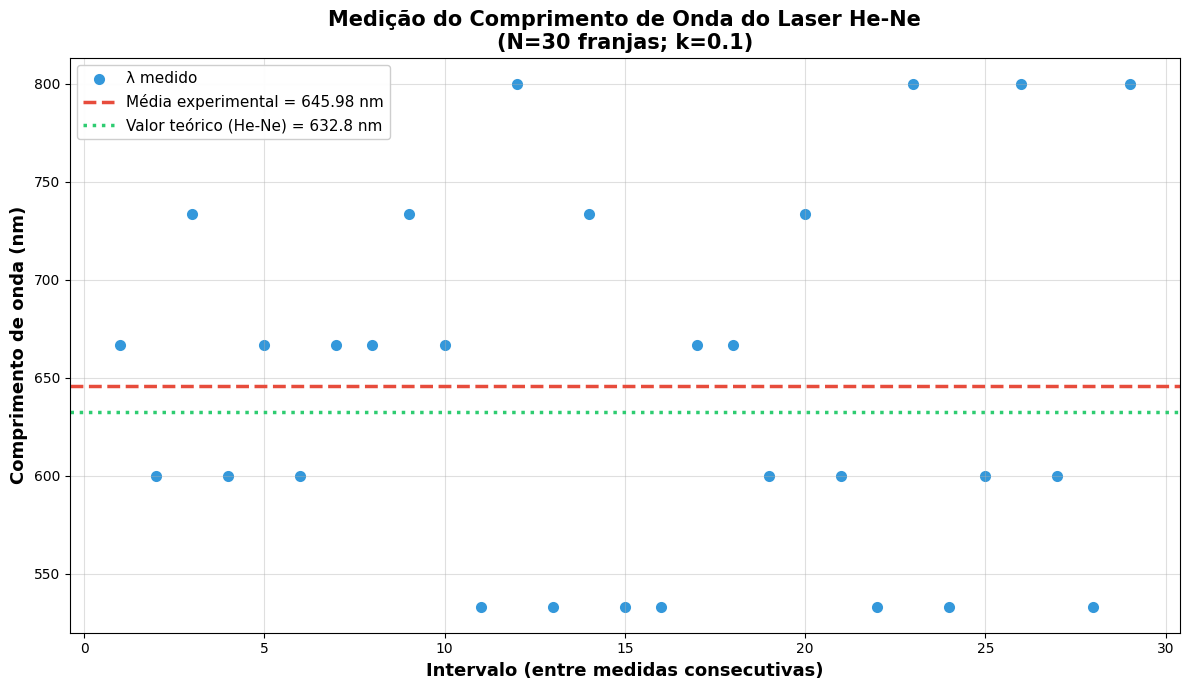


📊 RESUMO:
Comprimento de onda experimental: 645.98 ± 91.03 nm
Comprimento de onda teórico (He-Ne): 632.8 nm
Diferença absoluta: 13.18 nm
Erro percentual: 2.08%


: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

medidas_mm = np.array([
    6.05, 5.95, 5.86, 5.75, 5.66, 5.56, 5.47, 5.37, 5.27,
    5.16, 5.06, 4.98, 4.86, 4.78, 4.67, 4.59, 4.51, 4.41, 4.31,
    4.22, 4.11, 4.02, 3.94, 3.82, 3.74, 3.65, 3.53, 3.44, 3.36, 3.24
], dtype=float)

medidas_m = medidas_mm * 1e-3

deltas_read = np.abs(np.diff(medidas_m)) 

N = 30

def compute_lambda_nm(k):
    lambdas_m = (2.0 * k * deltas_read) / N
    return lambdas_m * 1e9  # nm

lambda_nm_k1 = compute_lambda_nm(1.0)
lambda_nm_k01 = compute_lambda_nm(0.1)

lambda_teorico = 632.8  # nm (valor do laser He-Ne)

def summarize(arr_nm, label):
    mean = np.mean(arr_nm)
    std = np.std(arr_nm, ddof=1)
    erro_percentual = abs(mean - lambda_teorico) / lambda_teorico * 100
    print(f"{label}:")
    print(f"  média = {mean:.2f} nm")
    print(f"  desvio padrão (amostral) = {std:.2f} nm")
    print(f"  min = {np.min(arr_nm):.2f} nm, max = {np.max(arr_nm):.2f} nm")
    print(f"  Valor teórico = {lambda_teorico} nm")
    print(f"  Erro percentual = {erro_percentual:.2f}%")
    print()

print("==== Resultados por intervalo (λ_i) ====")
summarize(lambda_nm_k1, "Sem correção mecânica (k = 1.0)")
summarize(lambda_nm_k01, "Com redução mecânica típica (k = 0.1)")

# Gráfico melhorado com valor teórico
plt.figure(figsize=(12, 7))
plt.scatter(range(1, len(lambda_nm_k01)+1), lambda_nm_k01, marker='o', 
         linewidth=2, color='#3498db', label='λ medido')
plt.axhline(np.mean(lambda_nm_k01), linestyle='--', linewidth=2.5, color='#e74c3c',
            label=f'Média experimental = {np.mean(lambda_nm_k01):.2f} nm')
plt.axhline(lambda_teorico, linestyle=':', linewidth=2.5, color='#2ecc71',
            label=f'Valor teórico (He-Ne) = {lambda_teorico} nm')
plt.xlabel('Intervalo (entre medidas consecutivas)', fontsize=13, fontweight='bold')
plt.ylabel('Comprimento de onda (nm)', fontsize=13, fontweight='bold')
plt.title('Medição do Comprimento de Onda do Laser He-Ne\n(N=30 franjas; k=0.1)', 
          fontsize=15, fontweight='bold')
plt.legend(fontsize=11, loc='best', framealpha=0.95)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

# Calcular erro
erro = abs(np.mean(lambda_nm_k01) - lambda_teorico)
print(f"\n📊 RESUMO:")
print(f"Comprimento de onda experimental: {np.mean(lambda_nm_k01):.2f} ± {np.std(lambda_nm_k01, ddof=1):.2f} nm")
print(f"Comprimento de onda teórico (He-Ne): {lambda_teorico} nm")
print(f"Diferença absoluta: {erro:.2f} nm")
print(f"Erro percentual: {abs(np.mean(lambda_nm_k01) - lambda_teorico) / lambda_teorico * 100:.2f}%")